In [2]:
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from skimage import data, exposure
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

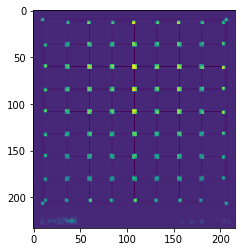

(<matplotlib.image.AxesImage at 0x7f8b7ca6c0f0>, None)

In [3]:
# Harris Corner Detection

img = cv2.imread('/content/chessboard.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]

#cv2.imshow('dst',img)
plt.imshow(dst),plt.show()

In [ ]:
#FOR SIFT (Since it has patent)

!pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

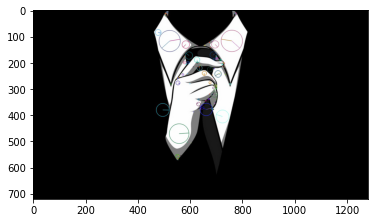

(<matplotlib.image.AxesImage at 0x7f7fb2b6b3c8>, None)

In [5]:
#SIFT

img= cv2.imread('/content/abc.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift=cv2.xfeatures2d.SIFT_create()
kp=sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img)
cv2.imwrite('/content/abc.jpg',img)

img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('/content/abc.jpg',img)

sift=cv2.xfeatures2d.SIFT_create
sift_img= cv2.imread('/content/abc.jpg')
plt.imshow(sift_img),plt.show()

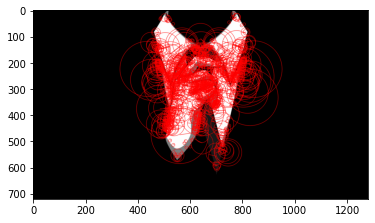

(<matplotlib.image.AxesImage at 0x7f7fb30e06a0>, None)

In [3]:
#SURF

img= cv2.imread('/content/abc.jpg')
surf=cv2.xfeatures2d.SURF_create()
kp, des = surf.detectAndCompute(img,None)
len(kp)

img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

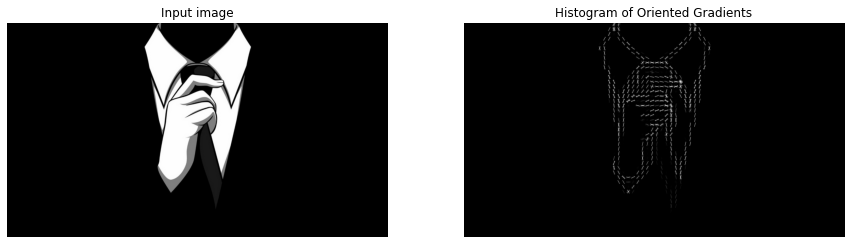

In [4]:
# Histogram of gradient

image = cv2.imread('/content/abc.jpg')
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')


hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()
win='hog image'